In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['progression'] = diabetes.target




In [16]:
df.head(8)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064,63.0


In [17]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


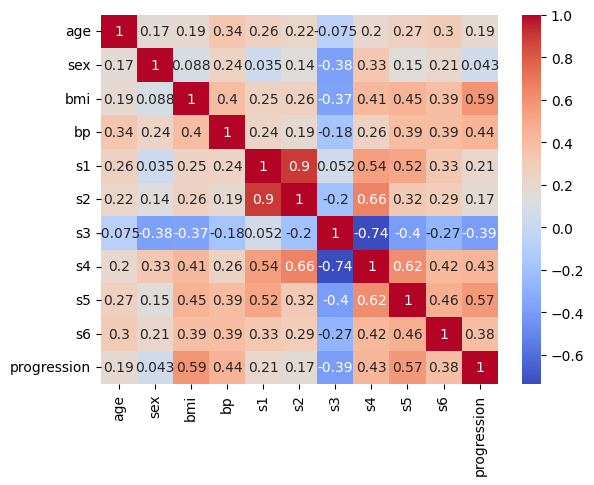

In [18]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [20]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


In [21]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [22]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [23]:
y.head()

,progression
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [43]:
X = df.drop('progression', axis=1)  # Features
y = df['progression']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [44]:
X_train

array([[ 1.48782782,  1.06548848,  0.25474221, ...,  0.72130245,
         0.57529619, -0.02265729],
       [-0.19230663,  1.06548848, -0.37972943, ...,  1.49710409,
         0.00572853,  0.41275676],
       [ 0.11317236, -0.93853666,  1.04783175, ..., -0.05449919,
         0.35816289, -0.28390573],
       ...,
       [ 0.6477606 , -0.93853666, -0.42504883, ..., -0.83030083,
        -0.22922772, -0.02265729],
       [-0.26867637, -0.93853666, -0.49302793, ..., -0.05449919,
        -0.80856925, -0.80640259],
       [-1.94881082, -0.93853666,  0.59463772, ..., -0.83030083,
        -0.10810835, -0.02265729]])

In [45]:
y_train

,progression
17,144.0
66,150.0
137,280.0
245,125.0
31,59.0
...,...
106,134.0
270,202.0
348,148.0
435,64.0


In [46]:
model = LinearRegression()

In [47]:
model.fit(X_train, y_train)

LinearRegression()

In [48]:
y_pred = model.predict(X_test)

In [49]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [50]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 2900.193628493481
R-squared: 0.4526027629719196


In [51]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_scaled, y, cv=5, scoring="r2")
print("Cross-Validation R2 Scores:", scores)
print("Mean Cross-Validation R2 Score:", np.mean(scores))

Cross-Validation R2 Scores: [0.42955615 0.52259939 0.48268054 0.42649776 0.55024834]
Mean Cross-Validation R2 Score: 0.48231643590864215


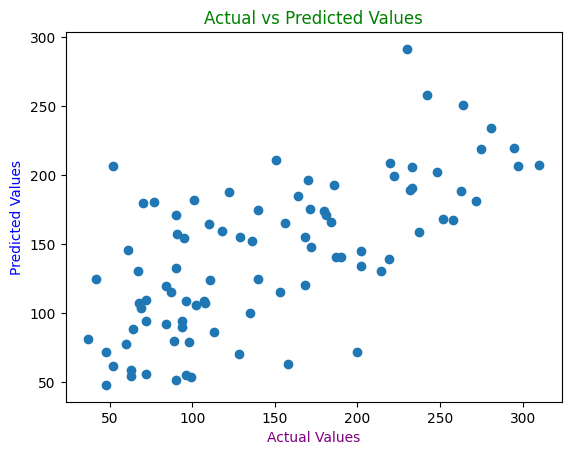

In [55]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values", color='purple')
plt.ylabel("Predicted Values", color='blue')
plt.title("Actual vs Predicted Values", color='green')
plt.show()